# INSTAGRAM: DETECCIÓN DE USUARIOS FALSOS

Instagram es una de las redes sociales mas utilizadas en el mundo. Desde su lanzamiento en 2010 ha crecido considerablemente y actualmente cuenta con mas de 100 millones de usuarios activos. 
Diariamente se crean miles de cuentas por parte de usuarios nuevos que se introducen a la aplicacion pero producto de su gran uso masivo, es cada vez mas común encontrar cuentas de usuarios falsas creadas para fines especificos como robo de identidad, viralización de sitios maliciosos, entre otros.

Este trabajo tiene como objetivo, a partir de un conjunto de datos tomados de los perfiles de usuarios de Instagram, predecir cuales de ellos son **reales** y cuales son **falsos**, utilizados como Bots o Spam.

Dataset elegido: https://www.kaggle.com/krpurba/fakeauthentic-user-instagram

## DESCRIPCIÓN DE LAS VARIABLES

<table>
    <tr>
        <td><strong>Variable</strong></td>
        <td><strong>Definicion</strong></td>
        <td><strong>Es utilizada?</strong></td>
        <td><strong>Entrada/Salida</strong></td>        
        <td><strong>Valor</strong></td>
    </tr>
    <tr>
        <td>pos</td>
        <td>Cantidad de publicaciones totales</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>flw</td>
        <td>Cantidad de seguidos</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>flg</td>
        <td>Cantidad de seguidores</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>bl</td>
        <td>Cantidad de caracteres de la biografía</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>pic</td>
        <td>Contiene imagen de perfil</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>0 = NO tiene / 1 = Tiene</td>
    </tr>
    <tr>
        <td>lin</td>
        <td>Contiene URL externa</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>0 = NO tiene / 1 = Tiene</td>
    </tr>
    <tr>
        <td>cl</td>
        <td>Número medio de caracteres de longitud de las publicaciones</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>cz</td>
        <td>Porcentaje de publicaciones con cantidad de caracteres casi nula</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>Entre 0.0 y 1.0</td>
    </tr>
    <tr>
        <td>ni</td>
        <td>Porcentaje de publicaciones sin imagenes</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>Entre 0.0 y 1.0</td>
    </tr>
    <tr>
        <td>erl</td>
        <td>Tasa de participación en Likes: Cantidad likes / Cantidad publicaciones / Nro seguidores</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>erc</td>
        <td>Tasa de participación en Comentarios: Cantidad comentarios / Cantidad publicaciones / Nro seguidores </td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>lt</td>
        <td>Porcentaje de publicaciones con ubicación</td>
        <td>Si</td>
        <td>Entrada</td>
        <td>Entre 0.0 y 1.0</td>
    </tr>
    <tr>
        <td>hc</td>
        <td>Número medio de hashtags utilizados en una publicación</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>pr</td>
        <td>Uso promedio de palabras clave promocionales en hashtags (ej: regrann, contest, repost, giveaway, mention, share, give away, quiz)</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    <tr>
        <td>fo</td>
        <td>Uso promedio de palabras claves de interacción en hashtags (ej: follow, like, follback)</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>cs</td>
        <td>Similitud de coseno promedio de entre todos los pares de dos publicaciones que tiene un usuario</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>pi</td>
        <td>Intervalo medio entre publicaciones (en horas)</td>
        <td>Si</td>
        <td>Entrada</td>
        <td></td>
    </tr>
    <tr>
        <td>class</td>
        <td>Clase de Usuario</td>
        <td>Si</td>
        <td>Salida</td>
        <td>f = fake / r =real</td>
    </tr>
</table>



In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_original = pd.read_csv('instagram.csv')

dataset = dataset_original

renamed_columns = {'pos':'post','flw':'followers','flg':'following','bl':'biography_lenght','pic':'profile_picture','lin':'external_url','cl':'post_lenght','cz':'post_lenght_null','ni':'none_image','erl':'engagement_rate_likes','erc':'engagement_rate_comments','lt':'post_location','hc':'hashtags_post','pr':'hashtags_promotional','fo':'hashtags_followers','cs':'cosine_similarity','pi':'interval_post','class':'user_class'}

dataset.rename(columns = renamed_columns, inplace = True)


## DESCRIPCIÓN GENERAL DE LOS DATOS

In [3]:
# Dimensiones del dataset
dataset.shape

(65326, 18)

In [4]:
# Ejemplos del dataset
dataset.sample(10)

,post,followers,following,biography_lenght,profile_picture,external_url,post_lenght,post_lenght_null,none_image,engagement_rate_likes,engagement_rate_comments,post_location,hashtags_post,hashtags_promotional,hashtags_followers,cosine_similarity,interval_post,user_class
47142,11,35,55,107,1,1,503,0.000000,0.545,13.250000,2.08,0.455,0.000,0.000,0.091,0.278972,202.780685,r
20373,142,636,953,55,1,0,336,0.111111,0.444,1.810000,0.20,0.000,0.611,0.167,0.000,0.060034,173.564484,f
64108,1,9,79,0,1,0,0,1.000000,0.000,244.440002,11.11,0.000,0.000,0.000,0.000,0.000000,0.000000,r
9362,845,540,1200,147,1,0,60,0.000000,0.278,2.370000,0.22,0.333,0.278,0.000,0.000,0.043721,127.351341,f
42259,8400,132900,4900,110,1,1,120,0.000000,0.500,0.180000,0.00,0.000,2.083,0.000,0.000,0.200337,6.245185,r
58642,43,179,821,0,1,0,85,0.055556,0.111,14.840000,0.74,0.278,0.500,0.000,0.000,0.368933,362.328766,r
13327,1100,570,3100,19,1,1,10,0.944444,0.000,1.390000,0.04,0.056,0.000,0.000,0.000,0.888889,36.087685,f
60843,56,496,2100,0,1,0,100,0.277778,0.111,11.820000,0.77,0.000,0.611,0.000,0.000,0.085970,564.645569,r
45899,10,132,1400,11,1,1,34,0.100000,0.000,26.889999,1.82,0.000,1.000,0.000,0.000,0.069810,336.062042,r
40596,170,294,34,69,1,1,171,0.000000,0.222,7.800000,0.02,0.056,0.222,0.000,0.111,0.138353,126.355713,r


In [5]:
# Datos estadisticos
dataset.describe()

,post,followers,following,biography_lenght,profile_picture,external_url,post_lenght,post_lenght_null,none_image,engagement_rate_likes,engagement_rate_comments,post_location,hashtags_post,hashtags_promotional,hashtags_followers,cosine_similarity,interval_post
count,65326.000000,6.532600e+04,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000
mean,176.571227,1.183077e+03,2310.519211,57.497061,0.951765,0.281925,136.520344,0.250012,0.193229,19.146641,1.139421,0.208877,0.507796,0.032745,0.052837,0.299098,496.475193
std,723.470655,2.170802e+04,2592.096104,64.129260,0.214264,0.449940,215.714486,0.337891,0.252939,121.047570,5.810627,0.300362,1.156921,0.220987,0.519058,0.349604,944.905389
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.230000e+02,394.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,2.730000,0.080000,0.000000,0.000000,0.000000,0.000000,0.033327,24.571458
50%,30.000000,3.380000e+02,995.000000,32.000000,1.000000,0.000000,46.000000,0.055556,0.059000,9.450000,0.440000,0.000000,0.077000,0.000000,0.000000,0.136915,183.227943
75%,124.000000,8.170000e+02,3600.000000,110.000000,1.000000,1.000000,170.000000,0.444444,0.333000,18.680000,1.040000,0.333000,0.611000,0.000000,0.000000,0.456342,580.771927
max,76200.000000,3.900000e+06,8800.000000,555.000000,1.000000,1.000000,3644.000000,1.000000,1.000000,26650.000000,1009.090027,1.000000,30.000000,20.000000,58.000000,1.000000,26786.134766


In [6]:
# Datos nulos por columna
dataset.isnull().sum()

post                        0
followers                   0
following                   0
biography_lenght            0
profile_picture             0
external_url                0
post_lenght                 0
post_lenght_null            0
none_image                  0
engagement_rate_likes       0
engagement_rate_comments    0
post_location               0
hashtags_post               0
hashtags_promotional        0
hashtags_followers          0
cosine_similarity           0
interval_post               0
user_class                  0
dtype: int64

# Descripcion de la variable de salida

Text(0.5, 1.0, 'Clases de usuarios')

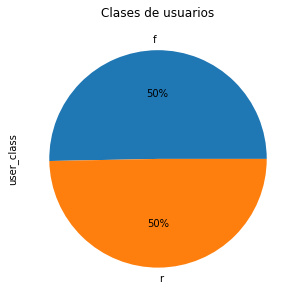

In [7]:
# Balanceo de datos

dataset.user_class.value_counts().plot.pie(autopct='%1.0f%%', figsize=(5,5)).set_title('Clases de usuarios')


Tal como se visualiza en el gráfico anterior, los datos de la **variable de salida** se encuentran **balanceados** ya que dentro del dataset existe la misma proporción de usuarios reales y falsos. Al estar balanceados los datos no tendremos consecuencias para predecir la clasificación de nuevos usuarios. 

# Descripción de 5 variables de entrada que afectan a la variable de salida

### Variable: profile_picture 

La variable profile_picture describe la cantidad de cuentas que tienen o no foto de perfil. 

Los valores posibles son: 0 (si no posee foto de perfil) y 1 (si posee foto de perfil)

Text(0.5, 1.0, 'Usuarios que poseen o no imagen de perfil')

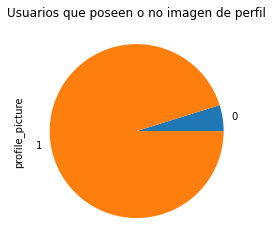

In [30]:
dataset.profile_picture.value_counts().sort_index().plot.pie().set_title('Usuarios que poseen o no imagen de perfil')

Dentro del dataset observamos que la gran mayoria de cuentas poseen foto de perfil.

#### Comportamiento con la variable de salida

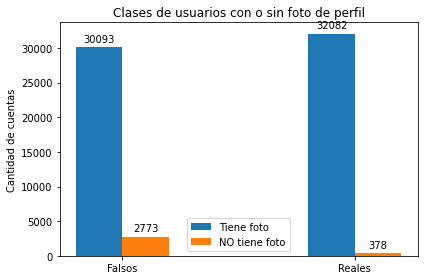

In [9]:
labels = ['Falsos','Reales']
con_foto = [len(dataset[(dataset.profile_picture == 1) & (dataset.user_class == 'f')]),
          len(dataset[(dataset.profile_picture == 1) & (dataset.user_class == 'r')])]

sin_foto = [len(dataset[(dataset.profile_picture == 0) & (dataset.user_class == 'f')]),
            len(dataset[(dataset.profile_picture == 0) & (dataset.user_class == 'r')])]

x = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, con_foto, width, label='Tiene foto')
rects2 = ax.bar(x + width/2, sin_foto, width, label='NO tiene foto')

ax.set_ylabel('Cantidad de cuentas')
ax.set_title('Clases de usuarios con o sin foto de perfil')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Tanto para usuarios falsos como reales, la mayoría de cuentas poseen foto de perfil. Sin embargo se puede notar que la **cantidad de usuarios falsos sin foto de perfil** es **mayor** que la **cantidad de usuarios reales sin foto de perfil.** 

### Variable: external_url 


La variable external_url describe la cantidad de cuentas que tienen o no URL externa.

Los valores posibles son: 0 (si no posee URL externa) y 1 (si posee URL externa)


Text(0.5, 1.0, 'Usuarios que poseen o no URL externa')

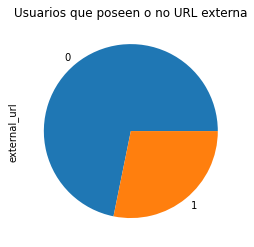

In [31]:
dataset.external_url.value_counts().sort_index().plot.pie().set_title('Usuarios que poseen o no URL externa')

Dentro del dataset observamos que la gran mayoria de cuentas no tienen URL externa.

#### Comportamiento con la variable de salida

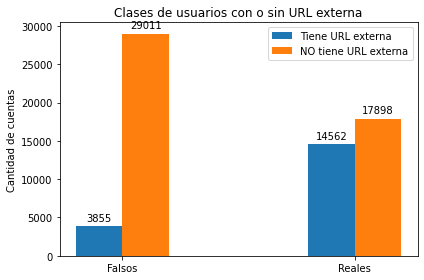

In [11]:
labels = ['Falsos','Reales']
con_foto = [len(dataset[(dataset.external_url == 1) & (dataset.user_class == 'f')]),
          len(dataset[(dataset.external_url == 1) & (dataset.user_class == 'r')])]

sin_foto = [len(dataset[(dataset.external_url == 0) & (dataset.user_class == 'f')]),
            len(dataset[(dataset.external_url == 0) & (dataset.user_class == 'r')])]

x = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, con_foto, width, label='Tiene URL externa')
rects2 = ax.bar(x + width/2, sin_foto, width, label='NO tiene URL externa')

ax.set_ylabel('Cantidad de cuentas')
ax.set_title('Clases de usuarios con o sin URL externa')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Tanto para usuarios falsos como reales, la mayoría de cuentas no poseen URL externa. Sin embargo se puede notar que la cantidad de usuarios falsos sin URL externa es mayor que la cantidad de usuarios reales sin URL externa o bien la cantidad de usuarios reales poseen mas URLs externas que los falsos.

### Variable: post_location 


La variable post_location describe el porcentaje de publicaciones con ubicación.

Los valores posibles van desde 0.0 a 1.0.


Text(0.5, 1.0, 'Usuarios que nunca colocaron su ubicación')

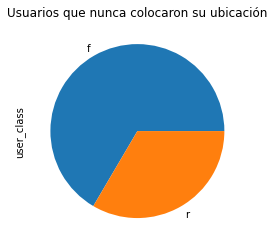

In [28]:
dataset[dataset.post_location==0.0].user_class.value_counts().sort_index().plot.pie().set_title('Usuarios que nunca colocaron su ubicación')


Dentro del dataset observamos que la cantidad de usuarios que nunca colocaron la ubicación en sus publicaciones es mayor para los usuarios falsos que para los reales, es decir que los datos nos indican que es mas común que los usuarios falsos no coloquen datos de ubicación. 

#### Comportamiento con la variable de salida

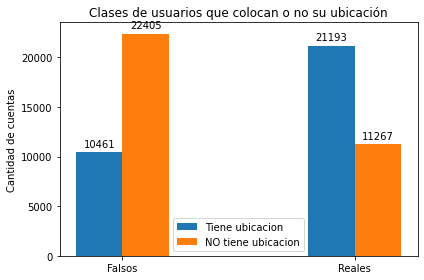

In [27]:
labels = ['Falsos','Reales']
con_ubicacion = [len(dataset[(dataset.post_location > 0.0) & (dataset.user_class == 'f')]),
                len(dataset[(dataset.post_location > 0.0) & (dataset.user_class == 'r')])]

sin_ubicacion = [len(dataset[(dataset.post_location == 0.0) & (dataset.user_class == 'f')]),
                len(dataset[(dataset.post_location == 0.0) & (dataset.user_class == 'r')])]

x = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, con_ubicacion, width, label='Tiene ubicacion')
rects2 = ax.bar(x + width/2, sin_ubicacion, width, label='NO tiene ubicacion')

ax.set_ylabel('Cantidad de cuentas')
ax.set_title('Clases de usuarios que colocan o no su ubicación')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Es mayor la cantidad de usuarios falsos que no colocan su ubicación que la cantidad de usuarios reales que no colocan su ubicación. 

### Variable: hashtags_post


La variable hashtags_post representa el número medio de hashtags utilizados en una publicación

Text(0.5, 1.0, 'Usuarios con publicaciones con hashtags promocionales')

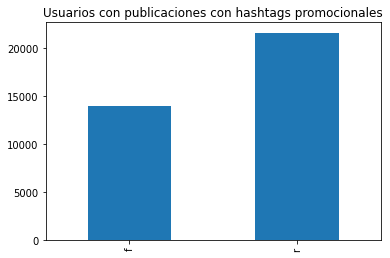

In [48]:
dataset[dataset.hashtags_post>0.0].user_class.value_counts().sort_index().plot.bar().set_title('Usuarios con publicaciones con hashtags promocionales')



Dentro del dataset observamos que los usuarios reales poseen un mayor uso de hashtags que los usuarios falsos

#### Comportamiento con la variable de salida

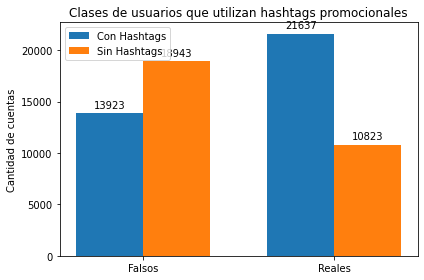

In [53]:
labels = ['Falsos','Reales']
con_hashtags_p = [len(dataset[(dataset.hashtags_post > 0.0) & (dataset.user_class == 'f')]),
                len(dataset[(dataset.hashtags_post > 0.0) & (dataset.user_class == 'r')])]

sin_hashtags_p = [len(dataset[(dataset.hashtags_post == 0.0) & (dataset.user_class == 'f')]),
                len(dataset[(dataset.hashtags_post == 0.0) & (dataset.user_class == 'r')])]

x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, con_hashtags_p, width, label='Con Hashtags')
rects2 = ax.bar(x + width/2, sin_hashtags_p, width, label='Sin Hashtags')

ax.set_ylabel('Cantidad de cuentas')
ax.set_title('Clases de usuarios que utilizan hashtags promocionales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Los usuarios reales utilizan mas hashtags que los falsos.

In [ ]:
# FALTARIA:
# Intervalo de horas
# Correlaciones entre variables

# Correlación de variables